<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split  # import function of data split
from sklearn.preprocessing import StandardScaler      # import standard scaler
from sklearn.linear_model import LinearRegression     # import linear regression model
from sklearn.linear_model import Ridge                # import linear regression model with L2 regularization
from sklearn.linear_model import Lasso                # import linear regression model with L1 regularization
import statsmodels.formula.api as smf                 # import statistical model
from sklearn.metrics import mean_squared_error, r2_score      # import MSE, r2_score
from sklearn.preprocessing import PolynomialFeatures  # import polynomial transformation
from sklearn.model_selection import KFold             # import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict   # import cross validation
from sklearn.pipeline import Pipeline                 # import pipeline
from sklearn.pipeline import make_pipeline            # import make pipeline
from sklearn.model_selection import GridSearchCV      # import Grid Search

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [3]:
data = pd.read_csv('diamonds.csv')               # Read the csv file
data = data.drop(data.columns[0], axis = 1)      # Drop the first data column of record numbers
data.head()                                      # Show data record examples

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


-----------------------------------------
#### `Datasets Information:`
-----------------------------------------
In this project, we'll showcase supervised regression analysis methods to predict diamond prices using a publicly available dataset from Kaggle (https://www.kaggle.com/datasets/shivam2503/diamonds). Diamonds are evaluated based on the 4Cs: cut, color, clarity, and carat. This renowned dataset encompasses the prices and various attributes of nearly 53,940 diamonds.


##### Attribute Information:

1. **carat** weight of the diamond (0.2--5.01)
2. **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
3. **color** diamond colour, from J (worst) to D (best)
4. **clarity** clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
5. **depth**  total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
6. **table** width of top of diamond relative to widest point (43--95)
7. **price** price in US dollars (\$326 --\$18,823)
9. **x** length in mm (0--10.74)
10. **y** width in mm (0--58.9)
11. **z** depth in mm (0--31.8)

### **LABELLED DIMENSIONS OF A DIAMOND**
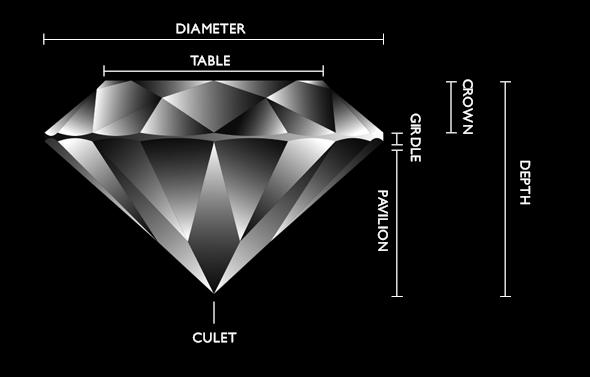

------------------------------------
#### `Exploratory Data Analysis, Data Cleaning, and Feature Engineering:`
------------------------------------
##### a. Univariate analysis

- Data types and description of the independent attributes,including (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates. Visualize the analysis using boxplots, histograms, or density curves, etc.

In [4]:
# check data types   
data.info()           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
# check data shape
data.shape         

(53940, 10)

In [6]:
# Check missing data (Null Values)  
data.isnull().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# drop duplicate rows in the dataframe
data.drop_duplicates(inplace=True, keep='last')  
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
#Dropping not acceptable negative values
#x, y and z are length so they can't be less or equal than zero 
data = data.loc[~(((data['x'] <= 0) | (data['y'] <= 0)) | (data['z'] <= 0))]
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##### Insight: 
- There is no NA data. So far we do not need to do additional changes to the dataframe considering missing values.
- There are duplicated rows in the table, we need to remove the duplicate rows as they represent the same correlation between the input and output variables.
- We dropped nonsense data, for example the dimension values should be greater than zero.

In [9]:
#Count of Unique Values in Each Column
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11597
x            553
y            550
z            374
dtype: int64

##### Insight: 
- From data type and the unique values, we can conclude that cut, color and clarity are categorical values. Other attributes are numerical.

['cut', 'color', 'clarity']
3


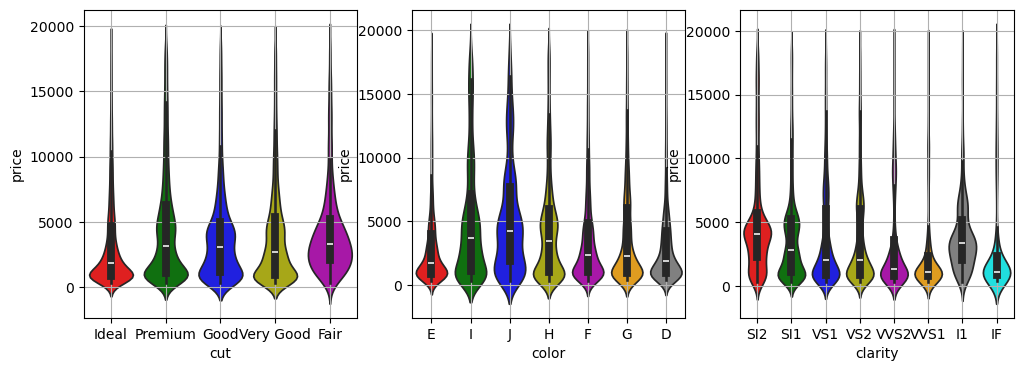

In [10]:
# Display the categorical variables
Listcat = data.select_dtypes(include=['object']).columns.tolist()
print(Listcat)

num_plots = len(Listcat)
print(num_plots)
num_rows = 1  # Add 1 and then floor division to ensure at least 2 rows
num_cols = len(Listcat)

cols = ['r', 'g','b','y','m', 'orange', 'grey','cyan']


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(Listcat):
    sns.violinplot(x=column,y="price", data=data, ax = axes[i], palette=cols,scale= "count")
    plt.xlabel(column)
    plt.ylabel('price')
    axes[i].grid(True)

plt.show()


##### Insight: 
- Violin plots are used to observe the distribution of numeric data, and are especially useful to make a comparison of distributions between multiple groups. We have compared price (target variable) distribution the among groups. 

In [11]:
# statistic Summary, only numerical variables are compared
data.describe().transpose()    

,count,mean,std,min,25%,50%,75%,max
carat,53775.0,0.797536,0.473169,0.20,0.40,0.70,1.04,5.01
depth,53775.0,61.748232,1.429639,43.00,61.00,61.80,62.50,79.00
table,53775.0,57.457806,2.233257,43.00,56.00,57.00,59.00,95.00
price,53775.0,3931.220288,3985.918716,326.00,951.00,2401.00,5324.00,18823.00
x,53775.0,5.731579,1.118611,3.73,4.71,5.70,6.54,10.74
y,53775.0,5.734909,1.139451,3.68,4.72,5.71,6.54,58.90
z,53775.0,3.539964,0.702017,1.07,2.91,3.53,4.03,31.80


In [12]:
# Gather all Numerical Data Columns
List = data.select_dtypes(include=['int64','float64']).columns.tolist() 
List

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [13]:
# check skewness of various numerical attributes 
data[List].skew()  

carat    1.113218
depth   -0.113711
table    0.792069
price    1.618220
x        0.396908
y        2.470200
z        1.589309
dtype: float64

7


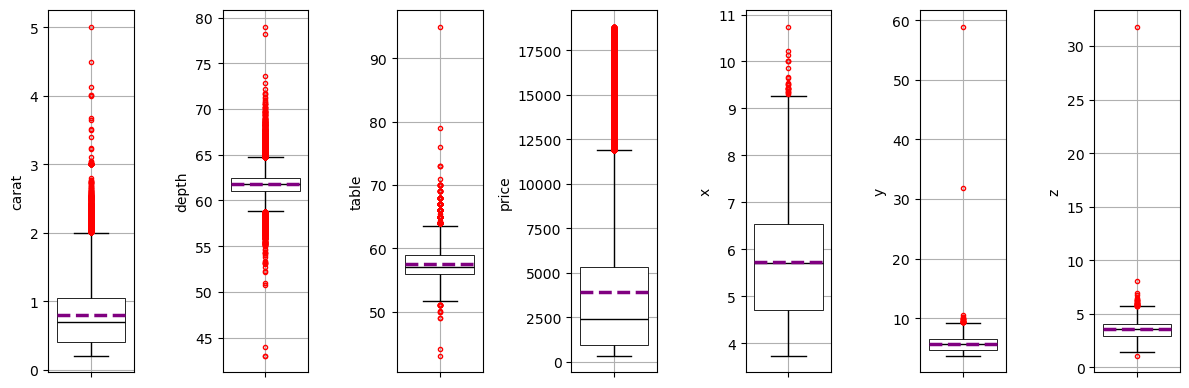

In [14]:
# Show Box Plots for continuous numercial features
num_plots = len(List)
print(num_plots)
num_rows = 1  # Add 1 and then floor division to ensure at least 2 rows
num_cols = len(List)

boxprops = dict(linestyle='-', linewidth=0.6)
flierprops = dict(marker='o',  
                  markersize=3,
                  markeredgecolor='red')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List):
    sns.boxplot(data=data, y=column, ax=axes[i], 
                meanline=True, showmeans=True,
                meanprops = meanlineprops, flierprops = flierprops, boxprops=boxprops, color='w',
                linecolor = 'black')
    axes[i].grid(True)
plt.tight_layout()


7


(0.0, 1.0, 0.0, 1.0)

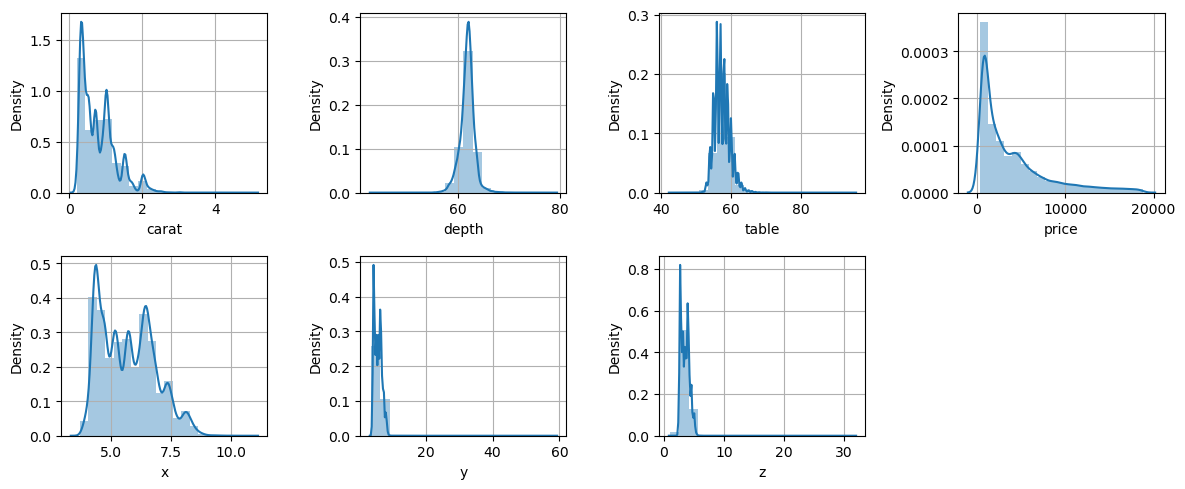

In [15]:
# Show histogram Plots for continuous numercial features
num_plots = len(List)
print(num_plots)
num_rows = 2  # Add 1 and then floor division to ensure at least 2 rows
num_cols = (num_plots) //2 + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List):
    sns.distplot(data[column],  ax=axes[i],  bins = 20, kde=True)
    axes[i].grid(True)
plt.tight_layout()
axes[-1].axis('off')

(0.0, 1.0, 0.0, 1.0)

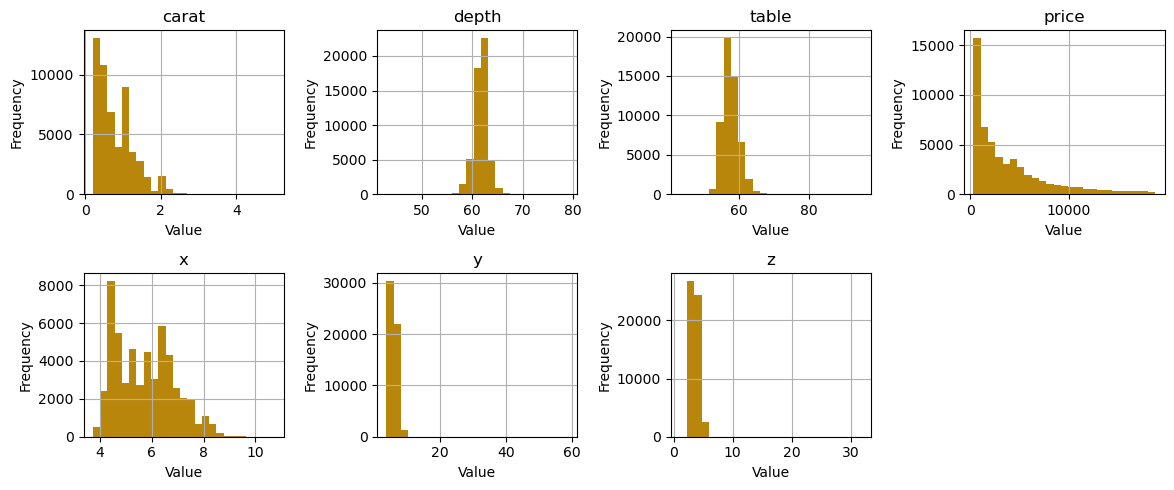

In [16]:
#Histogram for Numeric Columns
# Create a 4x2 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each numeric column and plot the histogram on a subplot
for i, col in enumerate(List):
    data[col].hist(ax=axes[i], bins=25, color='darkgoldenrod')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
axes[-1].axis('off')

In [17]:
# Restrict the data and remove the outliers
datacopy0 = data.copy()
List_rm = List.copy()
List_rm.remove('price')
print(List_rm)
List_rm.remove('carat')
print(List_rm)
for i, col in enumerate(List_rm):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1 
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    datacopy0 = datacopy0[datacopy0[col] > lower]
    datacopy0 = datacopy0[datacopy0[col] < upper]

print(datacopy0.shape)

['carat', 'depth', 'table', 'x', 'y', 'z']
['depth', 'table', 'x', 'y', 'z']
(50842, 10)


7


(0.0, 1.0, 0.0, 1.0)

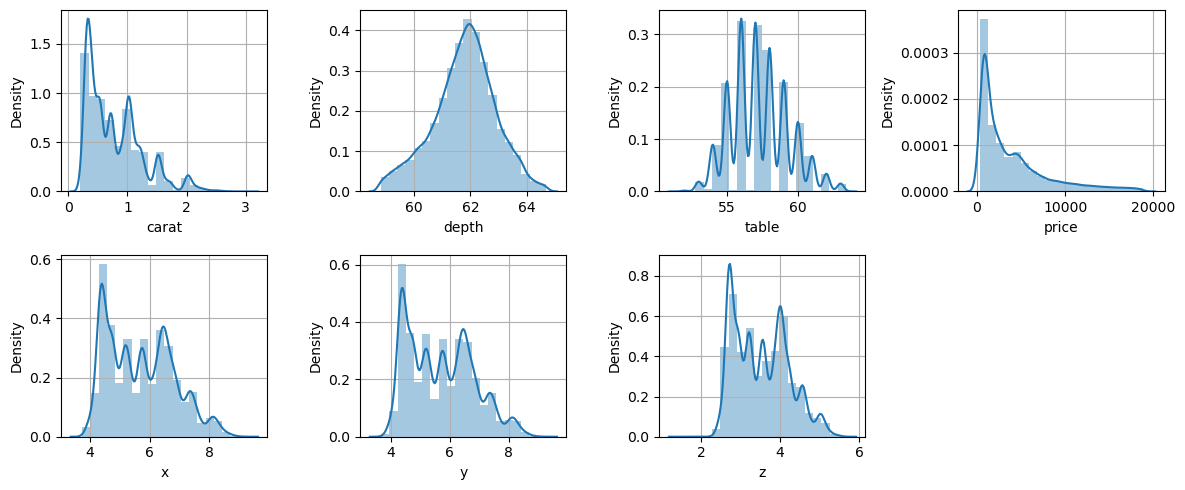

In [18]:
# Show histogram Plots for continuous numercial features again and check the distribution
num_plots = len(List)
print(num_plots)
num_rows = 2  # Add 1 and then floor division to ensure at least 2 rows
num_cols = (num_plots) //2 + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(List):
    sns.distplot(datacopy0[column],  ax=axes[i],  bins = 20, kde=True)
    axes[i].grid(True)
plt.tight_layout()
axes[-1].axis('off')

In [19]:
# check skewness of various numerical attributes again
datacopy0[List].skew()  

carat    1.054551
depth   -0.247740
table    0.362489
price    1.617940
x        0.403769
y        0.397862
z        0.393764
dtype: float64

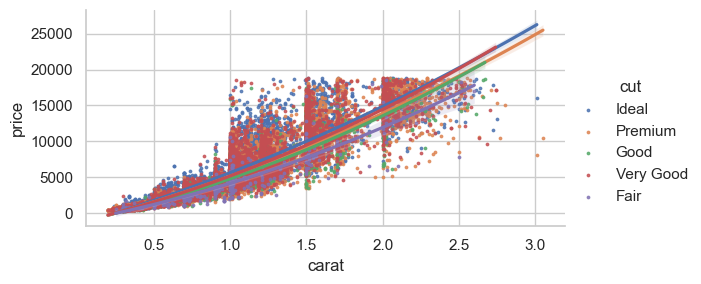

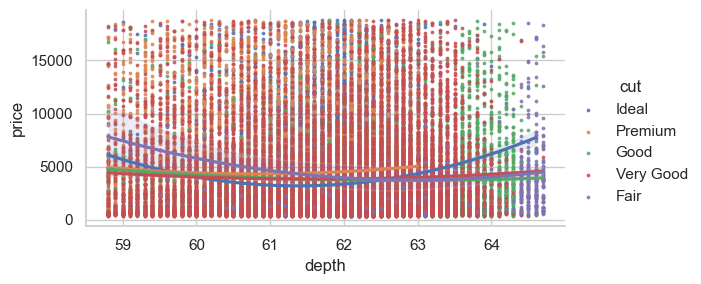

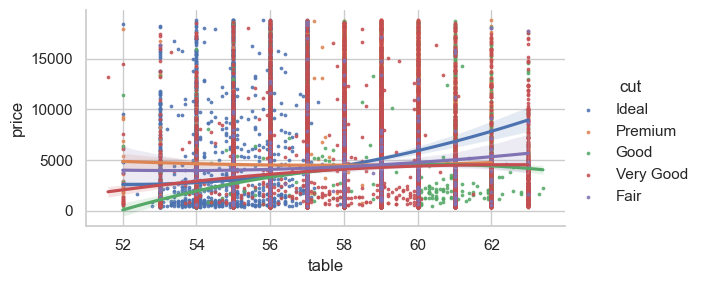

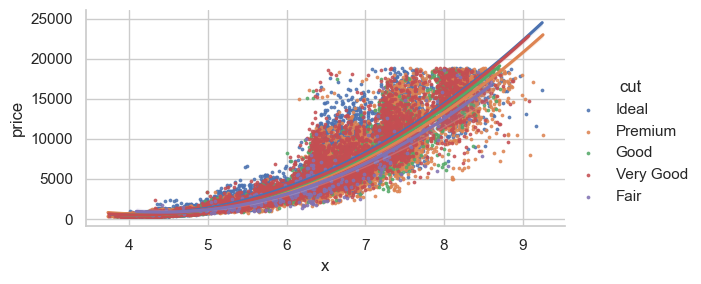

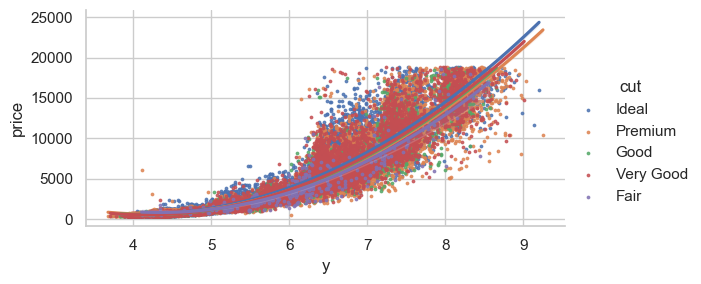

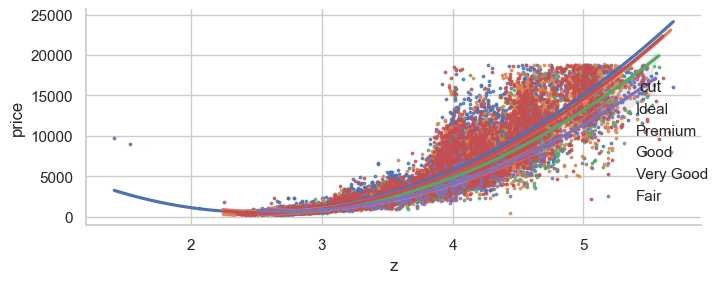

In [20]:
# Plot the univeraite relation with Price
sns.set(style="whitegrid")
for i, column in enumerate(List):
    if (column != 'price'):
        sns.lmplot(x=column, y='price', 
               data=datacopy0, order=2,
               scatter_kws={'s': 3}, 
                  height=3, aspect=2, hue = 'cut')
plt.tight_layout()
plt.show()

##### Insight: 
- Data attributes are in different scales. By normalizing the data based on standard scalar or min/max scalar, it is expected that model prediction can be improved.
- The outliers exist in the numeric attributes. In particular, we can see the y and z values have a lot of extremely larger outliers. These outliers may affect the final prediction. So we decided to drop the outliers coming from dimensional attributes. 
- All the numerical attributes are skewed (shown in above calculation and histogram plots). If skewness is less than zero, then negatively skewed (left tail) and if greater than zero then positively skewed (right tail). The negatively skewed attributes is depth. Other numerical atrributes are positively skewed. We could potentailly apply data transformation to ensure more normal distributed data.
- We plotted the relations between price and various numercial attributes in the univariate analysis section. The relation is more likely to be a curved instead of linear.

##### b. Bivariate analysis

- Bi-variate analysis between the predictor variables and target column. Comment on findings in terms of their relationship and degree of relation if any. Visualize the analysis using pair plots, heatmap, and so on.

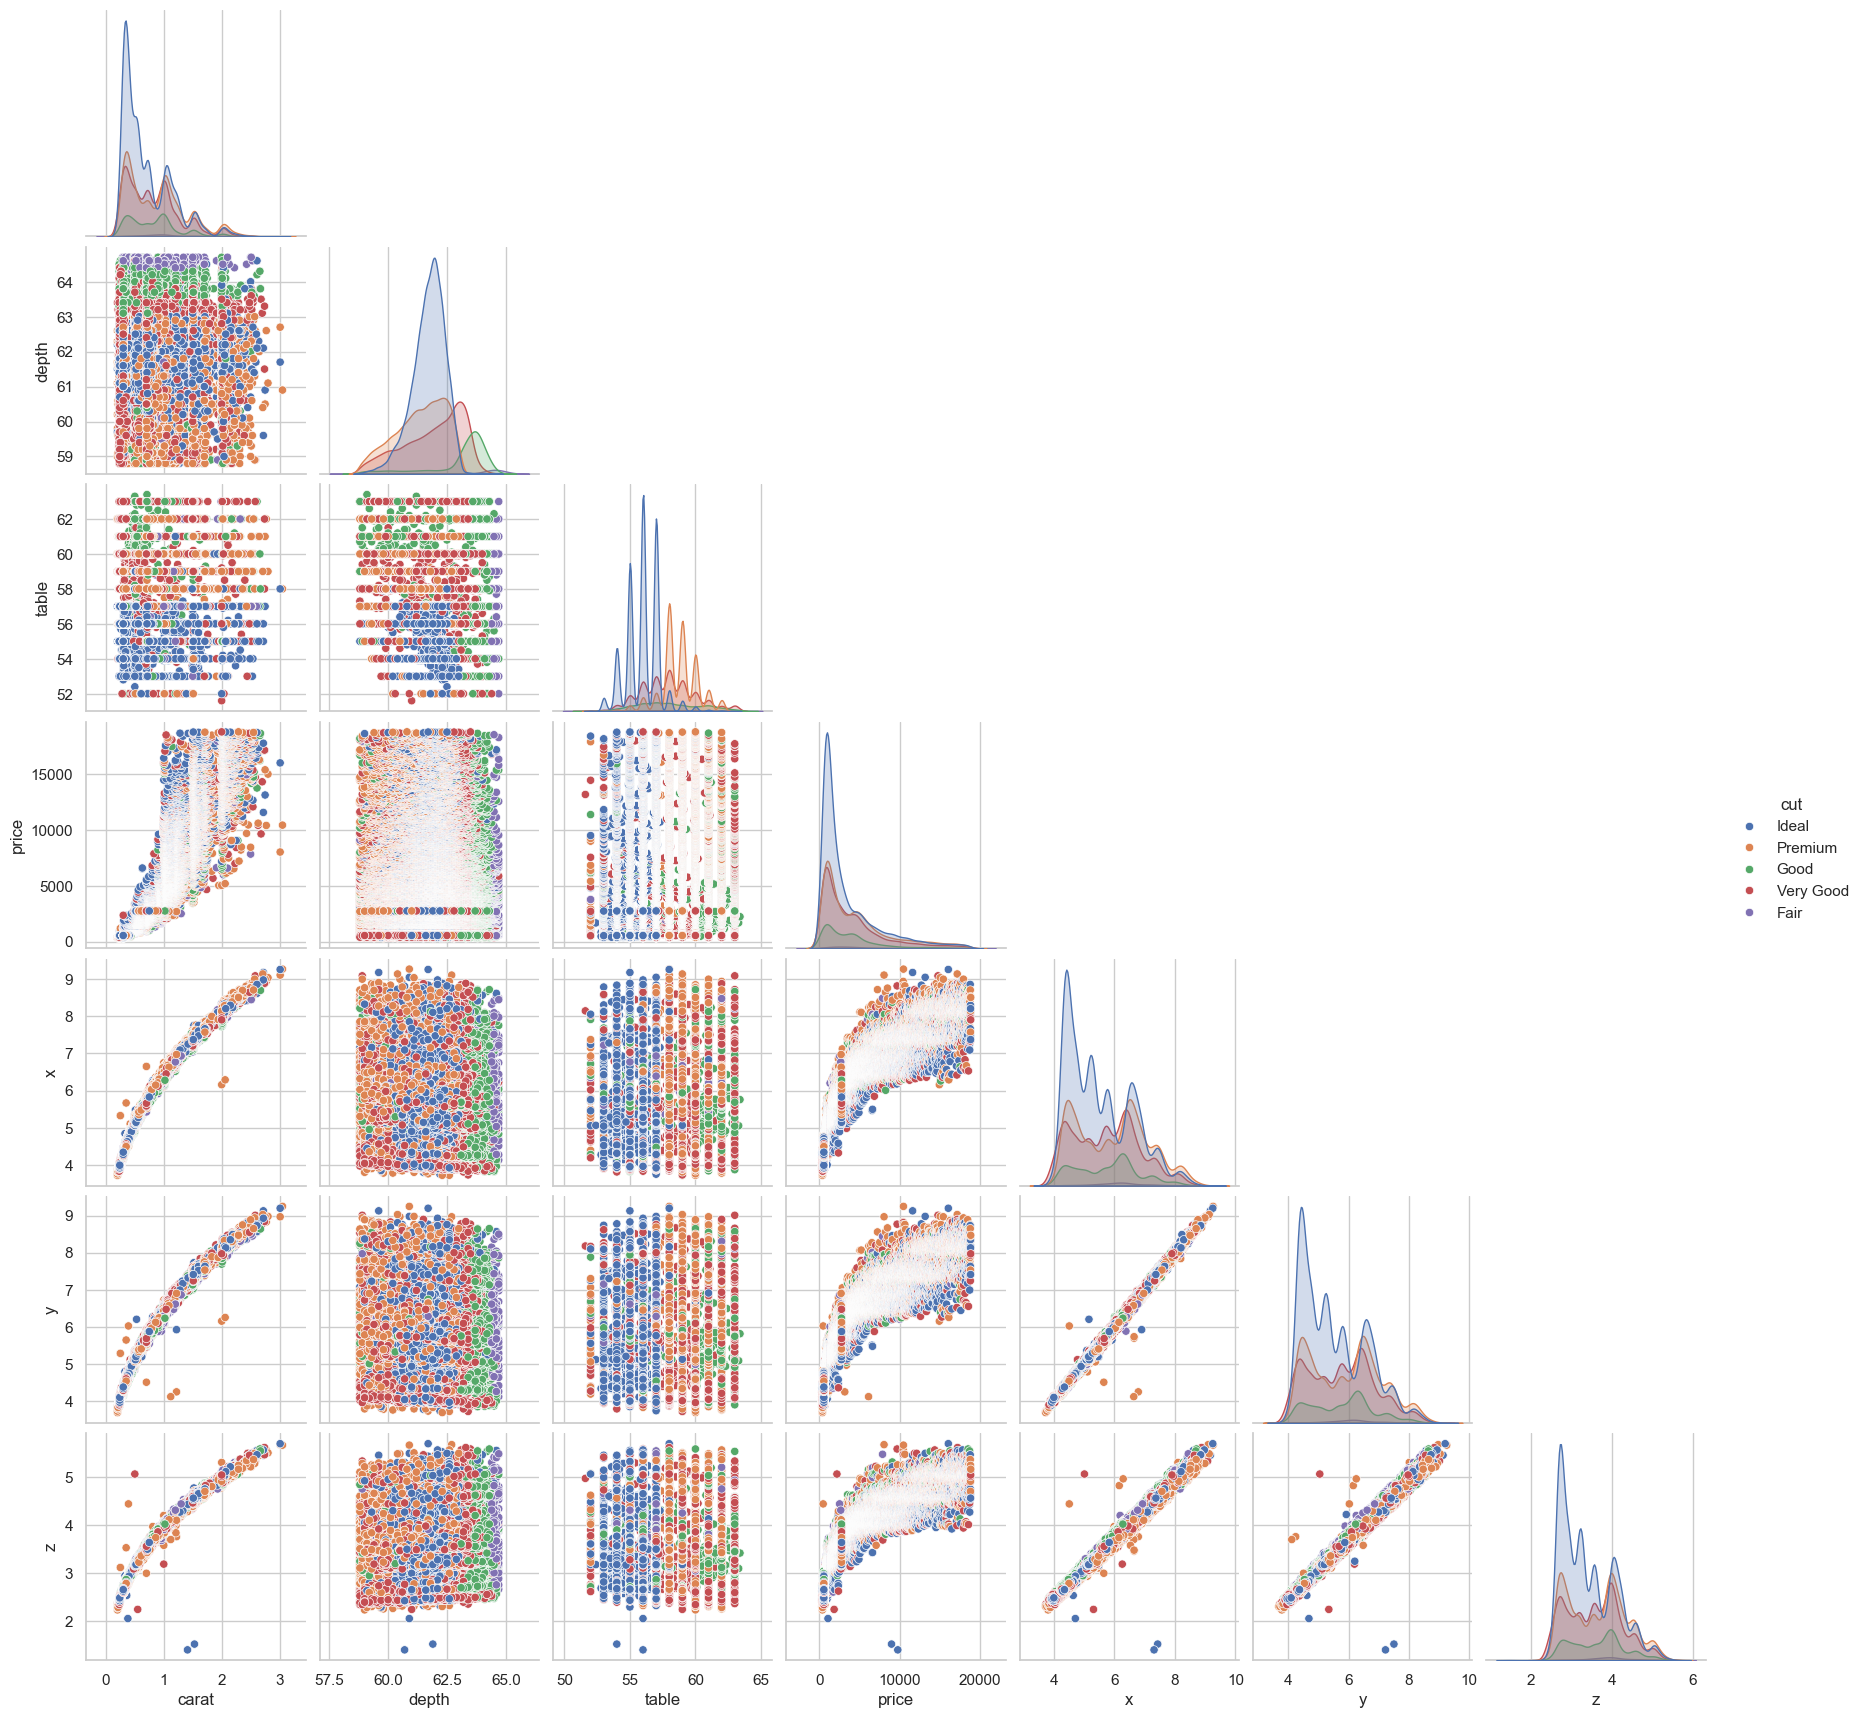

In [21]:
# Pair Plots
sns.pairplot(datacopy0,diag_kind='kde',hue ='cut',corner=True)                            
plt.show()

In [22]:
#print the correlation table
datacopy0[List].corr()                            

,carat,depth,table,price,x,y,z
carat,1.000000,0.021536,0.187963,0.927191,0.980089,0.979368,0.978980
depth,0.021536,1.000000,-0.243357,-0.007398,-0.017739,-0.019347,0.076172
table,0.187963,-0.243357,1.000000,0.137746,0.192565,0.187828,0.167687
price,0.927191,-0.007398,0.137746,1.000000,0.890461,0.891527,0.887447
x,0.980089,-0.017739,0.192565,0.890461,1.000000,0.998821,0.994499
y,0.979368,-0.019347,0.187828,0.891527,0.998821,1.000000,0.994337
z,0.978980,0.076172,0.167687,0.887447,0.994499,0.994337,1.000000


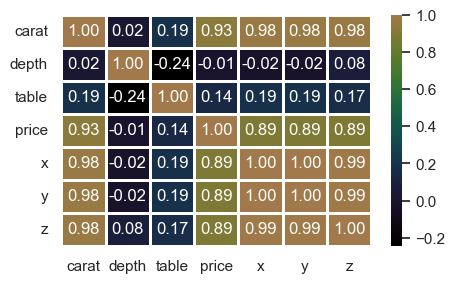

In [23]:
# heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(datacopy0[List].corr(),annot=True, linewidths=1, fmt= '.2f', center = 1,cmap="cubehelix" )  
plt.show()

##### Insight: 
- Strong correlations exist between the weight and dimensions (x, y, z). Strong correlations are also found between the dimensional parameters x, y, and z. Hence, we may consider x, y, z as a dependent variable of weight, and drop these attributes for the price prediction. But for now, let's keep all the attributes.

In [24]:
# Sample categorical data for cut, color, clarity
cut_cat = datacopy0['cut'].unique()
print("Original category of cut:", cut_cat)
color_cat = datacopy0['color'].unique()
print("Original category of color:", color_cat)
clarity_cat = datacopy0['clarity'].unique()
print("Original category of clarity:", clarity_cat)

Original category of cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Original category of color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Original category of clarity: ['SI2' 'SI1' 'VS2' 'VVS2' 'VVS1' 'VS1' 'I1' 'IF']


In [25]:
# Label Encoding without using labelencoder
datacopy = datacopy0.copy()
desired_cut_cat = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
desired_color_cat = {'J':0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
desired_clarity_cat = {'SI2': 0, 'SI1': 1, 'VS1': 2, 'VS2': 3, 'VVS2': 4, 'VVS1': 5, 'I1': 6, 'IF':7}
# Fit label encoder and transform data
datacopy['cut'] = [desired_cut_cat[label] for label in datacopy0['cut']]
datacopy['color'] = [desired_color_cat[label] for label in datacopy0['color']]
datacopy['clarity'] = [desired_clarity_cat[label] for label in datacopy0['clarity']]
datacopy.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,1,59.8,61.0,326,3.89,3.84,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,0,63.3,58.0,335,4.34,4.35,2.75
5,0.24,2,0,4,62.8,57.0,336,3.94,3.96,2.48


In [26]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50842 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50842 non-null  float64
 1   cut      50842 non-null  int64  
 2   color    50842 non-null  int64  
 3   clarity  50842 non-null  int64  
 4   depth    50842 non-null  float64
 5   table    50842 non-null  float64
 6   price    50842 non-null  int64  
 7   x        50842 non-null  float64
 8   y        50842 non-null  float64
 9   z        50842 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.3 MB


3


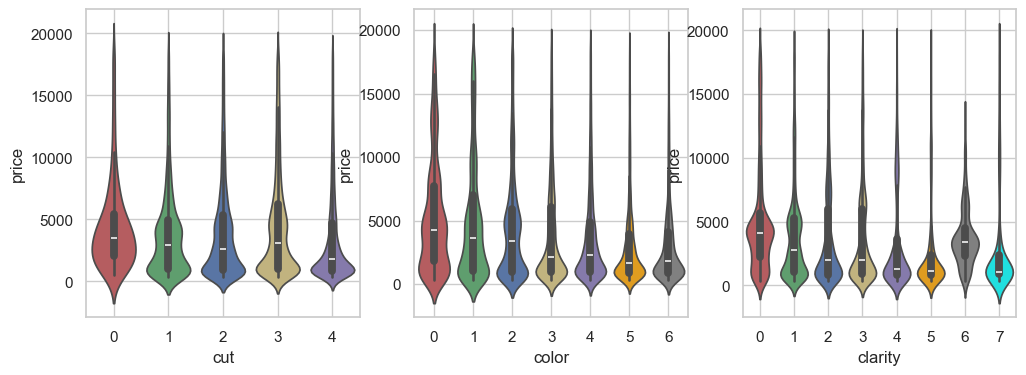

In [27]:
num_plots = len(Listcat)
print(num_plots)
num_rows = 1  # Add 1 and then floor division to ensure at least 2 rows
num_cols = len(Listcat)

cols = ['r', 'g','b','y','m', 'orange', 'grey','cyan']


fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(Listcat):
    sns.violinplot(x=column,y="price", data=datacopy, ax = axes[i], palette=cols,scale= "count")
    plt.xlabel(column)
    plt.ylabel('price')
    axes[i].grid(True)

plt.show()

##### Insight: 
- We decided to use label encoding instead of one-hot encoding in this scenario because the categories of cut, color, and clarity rank conditions from worst to perfect.
- We have successfully transformed the category values to numerical values. 

#### **<span style="color:darkgoldenrod;"><center>EDA key Summary</center></span>**
* Data has been cleaned to check NA values, remove the duplicates, drop nonsense data values and outliers.
* Both univariate analysis and bivariate analysis are performed for various data attributes.
  - There are two types of attributes in the dataset, categorical and numerical.
  - The distribution of categorical variable are compared based on different groups by using the violin plots.
  - The summary statistics, skewness, boxplot and histograms are used to visualize the numerical variables.
  - Pair plots are applied to explore the relations between different attributes and target variables.
  - The correlations and heat map are studied.
* Label encoding are carried out to prepare the data frame for further model fitting and prediction.

# 2. Objectives


The goal is to train more than three linear regression models and compare the model performances. These variations include a simple baseline using linear regression, an enhanced model considering polynomial regression, and the regression models using regularization. All models will use the same training and test splits and the same cross-validation method.

- <u> Technical Objective 1: </u> Peform train/validation/test split, then apply standard or min/max scaler to scale the data.
- <u> Technical Objective 2: </u> Select models and perform the regression tasks, including linear, Polynominal, LASSO, Ridge, ElasticNet and so on.
- <u> Technical Objective 3: </u> Train model and tuning the hyperparameters.
- <u> Technical Objective 4: </u> Interpret the infuence of data attributes on the final target prediction.
- <u> Technical Objective 5: </u> Compare the accuracies between different models in terms of accuracy (such as R2_Score, RMSE). 

# 3. Linear Regression Models


In [28]:
# Define train/validation/test split ratio and random state
test_size = 0.30
random_state= 11 

In [29]:
# Prepare the input and output variables
y_col = 'price'
X = datacopy.drop(y_col, axis = 1)
y = datacopy[y_col]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size , random_state=random_state) 

In [30]:
# check whether the split is correct
print("{0:0.2f}% data is in training set".format((len(X_train)/len(datacopy.index)) * 100))   
print("{0:0.2f}% data is in test set".format((len(X_test)/len(datacopy.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [31]:
# Check X_train
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,35589.0,0.784531,0.468469,0.20,0.39,0.70,1.04,3.05
cut,35589.0,3.017983,1.012961,0.00,2.00,3.00,4.00,4.00
color,35589.0,3.405490,1.700480,0.00,2.00,3.00,5.00,6.00
clarity,35589.0,2.278120,1.758976,0.00,1.00,2.00,3.00,7.00
depth,35589.0,61.783250,1.109973,58.80,61.10,61.90,62.50,64.70
table,35589.0,57.294847,2.023878,52.00,56.00,57.00,59.00,63.40
x,35589.0,5.696929,1.117052,3.73,4.68,5.66,6.52,9.26
y,35589.0,5.700855,1.110187,3.68,4.69,5.67,6.52,9.25
z,35589.0,3.520981,0.689911,2.24,2.89,3.50,4.03,5.69


In [32]:
# apply standard scaler to scale the train data
s = StandardScaler()
X_train_s = s.fit_transform(X_train)
X_train_s_df = pd.DataFrame(X_train_s, columns=X.columns)

In [33]:
# Describe standard scaled train dataset
X_train_s_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,35589.0,6.628458e-17,1.000014,-1.247764,-0.842182,-0.180443,0.545336,4.835966
cut,35589.0,1.712019e-17,1.000014,-2.979409,-1.004972,-0.017753,0.969465,0.969465
color,35589.0,-9.084182e-17,1.000014,-2.002693,-0.826537,-0.238460,0.937695,1.525773
clarity,35589.0,5.590266e-18,1.000014,-1.295158,-0.726637,-0.158117,0.410404,2.684486
depth,35589.0,-4.370590e-15,1.000014,-2.687717,-0.615565,0.105184,0.645745,2.627804
table,35589.0,3.967092e-16,1.000014,-2.616225,-0.639794,-0.145686,0.842530,3.016604
x,35589.0,-4.374383e-16,1.000014,-1.760846,-0.910381,-0.033060,0.736834,3.189752
y,35589.0,8.543124e-16,1.000014,-1.820309,-0.910540,-0.027793,0.737855,3.196935
z,35589.0,1.455466e-16,1.000014,-1.856758,-0.914595,-0.030411,0.737814,3.143954


#### i) Apply statistical model for linear fit and check results

In [34]:
# Analyze using the statistical model
data_train = pd.concat([X_train, y_train], axis=1)
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
print(lm1.params)
print(lm1.summary())  #Inferential statistics

Intercept    -4308.179942
carat        12387.794986
cut            109.979115
color          300.815892
clarity        308.503748
depth          123.035566
table          -36.376644
x            -2243.897464
y             3096.892866
z            -3969.575450
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 3.659e+04
Date:                Sat, 20 Apr 2024   Prob (F-statistic):               0.00
Time:                        00:22:46   Log-Likelihood:            -3.0417e+05
No. Observations:               35589   AIC:                         6.084e+05
Df Residuals:                   35579   BIC:                         6.085e+05
Df Model:                           9                                         
Covariance Typ

In [74]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['smf'], 'R2': 0.902})
resultsDf = resultsDf[['Method', 'R2']]
resultsDf

,Method,R2
0,smf,0.902


##### Insight:
- We performed linear fit use the not scaled attribute values.
- The R-squared value is 0.902, indicating that approximately 90.2% of the variance in the dependent variable (price) is explained by the independent variables in the model.
The adjusted R-squared is also 0.902, which is the same as the R-squared in this cass, implying that adding additional predictors did not improve the mode.
- The F-statistic is 3.659e+04, and the associated p-value is very close to zero (0.00). The overall regression model is statistically significant. At least one independent variable is contributing significantly to explaining the variability in the dependent variable.l
- Standard errors represent the variability or uncertainty in the estimated coefficients. Smaller standard errors indicate more precise estimates. The standard error a relatively large.
- The condition number measures the multicollinearity in the model. A large condition number (> 30) suggests strong multicollinearity among the independent variables, which can lead to unreliable estimates of coefficients Hence, regularization will be helpful in this case..

#### ii) Apply linear regression model fit and check results

In [36]:
# invoke the LinearRegression function and find the bestfit model on training data without standard scaler
LRM_ws = LinearRegression()
LRM_ws.fit(X_train, y_train)

LinearRegression()

In [37]:
# Print the coefficients for every attribute
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LRM_ws.coef_[idx]))

intercept = LRM_ws.intercept_
print("The intercept for our model is {}".format(intercept))

The coefficient for carat is 12387.79498563533
The coefficient for cut is 109.97911506075279
The coefficient for color is 300.81589205598596
The coefficient for clarity is 308.50374822818077
The coefficient for depth is 123.03556592697402
The coefficient for table is -36.37664396448166
The coefficient for x is -2243.8974636042954
The coefficient for y is 3096.892865902356
The coefficient for z is -3969.5754496013155
The intercept for our model is -4308.179941773979


##### Insight:
- Without applying the standard scaler, we can see that the fitting results for a linear regression model are exactly same from the statistical model.

In [38]:
# invoke the LinearRegression function and find the bestfit model on training data with standard scaler
LRM = LinearRegression()
LRM.fit(X_train_s, y_train)

LinearRegression()

In [39]:
# Print the coefficients for every attribute
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, LRM.coef_[idx]))

intercept = LRM.intercept_
print("The intercept for our model is {}".format(intercept))

The coefficient for carat is 5803.218618506569
The coefficient for cut is 111.40298973949787
The coefficient for color is 511.5241203888048
The coefficient for clarity is 542.6431190605884
The coefficient for depth is 136.5641813408026
The coefficient for table is -73.62085585362311
The coefficient for x is -2506.515916965274
The coefficient for y is 3438.081482425382
The coefficient for z is -2738.6167961485535
The intercept for our model is 3881.7301975329424


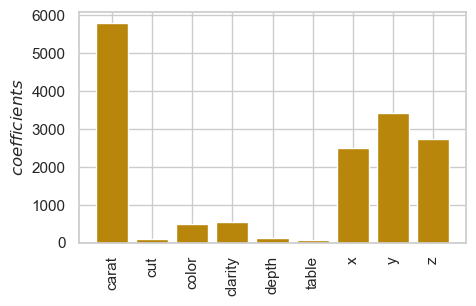

In [40]:
# Visualize the estimated coefficients for the linear regression problem.
plt.figure(figsize=(5, 3))
plt.bar(X_train.columns[:],abs(LRM.coef_[:]), color = 'darkgoldenrod')
plt.xticks(rotation=90)
plt.ylabel("$coefficients$")
plt.show()

In [41]:
# Evaluate the prediction accuracy using the test dataset
X_test_s = s.transform(X_test)
print("Linear Regression Model Training Accuracy:", LRM.score(X_train_s, y_train))                 #Training Accuracy 
print("Linear Regression Model Testing Accuracy:", LRM.score(X_test_s, y_test))                    #Testing Accuracy 

Linear Regression Model Training Accuracy: 0.9024972619406935
Linear Regression Model Testing Accuracy: 0.902411368144542


In [42]:
# Check different accuracy measurement
y_predict = LRM.predict(X_test_s)
LRM_MSE = mean_squared_error(y_test, y_predict)
print("Linear Regression Model ----- RMSE:", np.sqrt(LRM_MSE))
LRM_R2 = r2_score(y_test, y_predict)
print("Linear Regression Model ----- R2 Score:", LRM_R2)

Linear Regression Model ----- RMSE: 1234.5877723959857
Linear Regression Model ----- R2 Score: 0.902411368144542


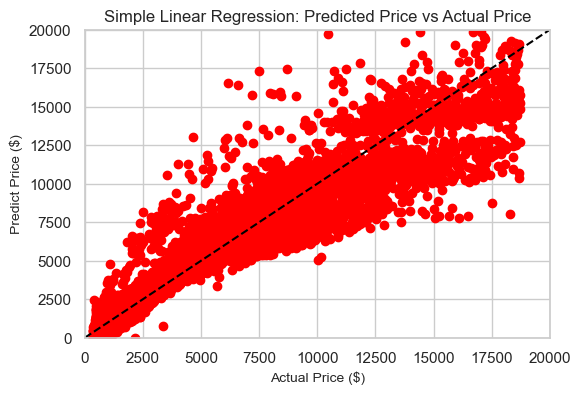

In [43]:
# Check the actual vs prediction
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test, y_predict, color='Red')
plt.plot([0,20000],[0,20000], '--', color='black')
plt.title('Simple Linear Regression: Predicted Price vs Actual Price', fontsize=12)
plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.ylabel('Predict Price ($)', fontsize=10)
plt.xlabel('Actual Price ($)', fontsize=10)
plt.show()

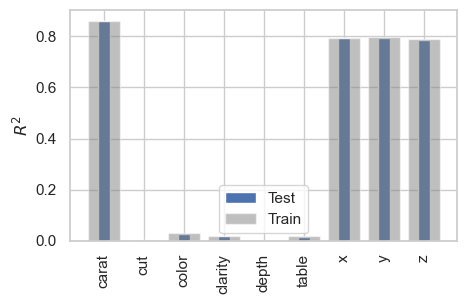

Training R^2 mean value 0.36776330490005843 Testing R^2 mean value 0.36596187628464905 
Training R^2 max value 0.860208057532723 Testing R^2 max value 0.8584065710380953 


In [44]:
# Define get helper function
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_train.append(model.score(X_train[[feature]],y_train))
        R_2_test.append(model.score(X_test[[feature]],y_test))
    plt.figure(figsize=(5, 3))
    plt.bar(features,R_2_test,label="Test", width=0.3)    
    plt.bar(features,R_2_train,label="Train", alpha=0.5, color='grey')
    
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

get_R2_features(LRM)

In [75]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['LinearRegression'], 'R2': LRM_R2})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,R2
0,smf,0.902000
0,LinearRegression,0.902411


##### Insight:
- The larger coefficients play more importance roles on the prediction, including weight, and dimensions, x, y, z.
- From the linear model regression analysis, we can conclude that the model may be improved by considering the polynominal regression.
- In addition, the multicollinearity exists. Regularization techniques such as Ridge regression or Lasso regression can help mitigate its effects. These techniques add a penalty term to the loss function, which helps to reduce the magnitudes of the coefficients, thereby reducing the impact of multicollinearity.

#### iii) Apply LASSO linear model and check results

In [46]:
# Define helper function

def get_accuracy_plots(model, X_train_s, y_train, X_test_s, y_test):

    y_pred = model.predict(X_test_s)
    print ("Model coefficients:", (model.coef_))
    print("Training Accuracy:", model.score(X_train_s, y_train))
    print("Testing Accuracy:", model.score(X_test_s, y_test))
    MSE = mean_squared_error(y_pred, y_test)
    print("Model RMSE:", np.sqrt(MSE))
    
    # Check the actual vs prediction
    fig = plt.figure(figsize=(6,4))
    plt.scatter(y_test, y_pred, color='Red')
    plt.plot([0,20000],[0,20000], '--', color='black')
    plt.title('Predicted Price vs Actual Price', fontsize=12)
    plt.xlim([0, 20000])
    plt.ylim([0, 20000])
    plt.xlabel('Predicted Price ($)', fontsize=10)
    plt.ylabel('Actual Price ($)', fontsize=10)
    plt.show()   
    return r2_score(y_test, y_pred)

Model coefficients: [ 5742.10572254    97.15120832   508.66986773   545.4402423
     6.66009345   -87.08668574 -1921.82930354  1617.6459015
 -1437.59607634]
Training Accuracy: 0.9021950923377524
Testing Accuracy: 0.9031094437070522
Model RMSE: 1230.164191979758


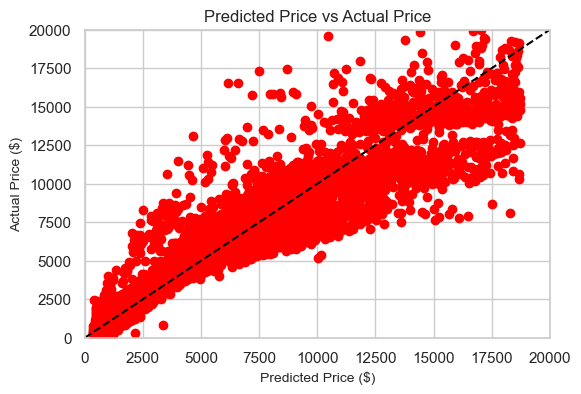

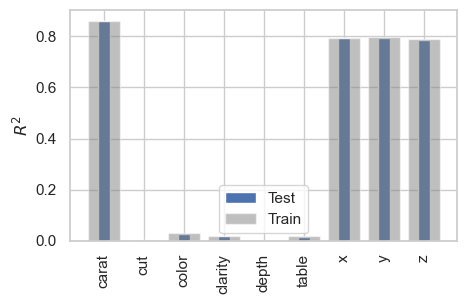

Training R^2 mean value 0.36776322838444586 Testing R^2 mean value 0.36596116512047117 
Training R^2 max value 0.860207771485941 Testing R^2 max value 0.8583992820129526 


In [47]:
# Fitting the linear regression model with Lasso regularization
lasso = Lasso(alpha=1)
lasso.fit(X_train_s,y_train)
lasso_R2 = get_accuracy_plots(lasso,X_train_s, y_train, X_test_s, y_test)
get_R2_features(lasso)

In [48]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Linear + Lasso (alpha = 1)'], 'R2': lasso_R2})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,R2
0,smf,0.902000
0,LinearRegression,0.902411
0,Linear + Lasso (alpha = 1),0.903109


##### Insight:
- We observe that Lasso L1 regularization slightly improves the prediction accuracy.

#### iv) Apply Ridge linear model fit and check results

Model coefficients: [ 5742.43979551   105.02237376   509.79025501   544.83000069
    67.46248223   -79.98066372 -2236.62597902  2514.78719919
 -2022.57083581]
Training Accuracy: 0.9024138772954055
Testing Accuracy: 0.9029147389931442
Model RMSE: 1231.399599055478


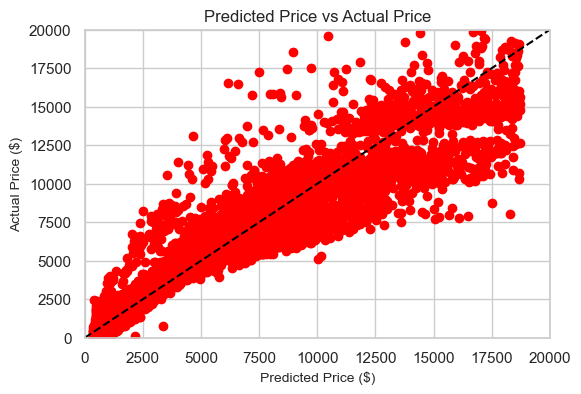

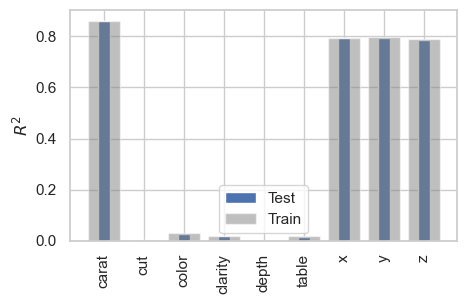

Training R^2 mean value 0.3677631089700417 Testing R^2 mean value 0.3659601492894448 
Training R^2 max value 0.860206650964357 Testing R^2 max value 0.8583896478584234 


In [49]:
# Fitting the Ridge linear regression model with L2 regularization
ridge = Ridge(alpha=10)
ridge.fit(X_train_s,y_train)
ridge_R2 = get_accuracy_plots(ridge,X_train_s, y_train, X_test_s, y_test)
get_R2_features(ridge)

In [76]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Linear + Ridge (alpha = 10)'], 'R2': ridge_R2})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,R2
0,smf,0.902000
0,LinearRegression,0.902411
0,Linear + Ridge (alpha = 10),0.902915


##### Insight:
- We observe that Ridge L2 regularization slightly improves the prediction accuracy.

#### v) Apply polynominal regression fit and check results

Model coefficients: [ 1.01754129e-13  2.65280211e+03  8.75026832e+01  5.10010916e+02
  6.40509455e+02  6.63167253e+01 -3.60650234e+01 -1.40364312e+03
  2.24517972e+03  2.60184234e+02 -3.71378317e+03  1.60800628e+02
 -6.78772457e+01 -8.08682964e+02  3.50969732e+02  2.46313499e+02
 -2.20474227e+03  5.76978919e+03  3.68453529e+03  1.20830963e+01
  2.09696525e+01  7.59043666e+01 -8.94723674e+01 -3.62494250e+00
 -8.81277281e+02 -4.04720742e+02  1.25719762e+03 -1.09252770e+02
  1.90855718e+02  9.82106691e+01 -1.22530928e+01  2.59441670e+02
  1.21174086e+03 -9.24978101e+02 -1.61772098e+02  1.65043624e+02
 -1.03250430e+01 -7.94162302e+02  3.47264671e+03 -1.58816019e+03
  1.30914849e+02 -7.38535015e+00  5.80857415e+02  1.52628564e+03
 -1.96547286e+03 -1.58383181e+01  1.88980981e+02 -3.71450114e+02
 -6.65664669e+01  1.33818888e+03  2.12901728e+03 -3.54563539e+03
  3.39660405e+03 -7.23749123e+03  1.43540964e+03]
Training Accuracy: 0.9373389489830124
Testing Accuracy: 0.9237344802296059
Model RMSE

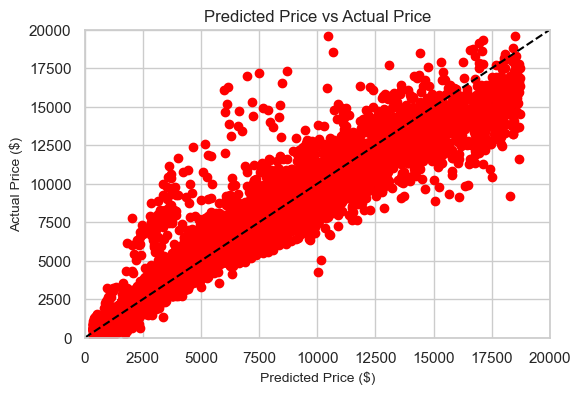

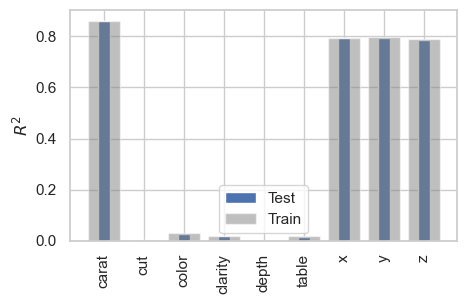

Training R^2 mean value 0.36776330490005843 Testing R^2 mean value 0.36596187628464905 
Training R^2 max value 0.860208057532723 Testing R^2 max value 0.8584065710380953 


In [51]:
# Realize Quantradic Transformation and model fit using linear regression analysis
poly = PolynomialFeatures(degree=2)
X_train2_s = poly.fit_transform(X_train_s)
X_test2_s = poly.fit_transform(X_test_s)
poly_clf = LinearRegression()
poly_clf.fit(X_train2_s, y_train)

poly_R2 = get_accuracy_plots(poly_clf,X_train2_s, y_train, X_test2_s, y_test)
get_R2_features(poly_clf)

In [77]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Polynominal degree 2'], 'R2': poly_R2})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,R2
0,smf,0.902000
0,LinearRegression,0.902411
0,Linear + Ridge (alpha = 10),0.902915
0,Polynominal degree 2,0.923734


##### Insight:
- We observe that the prediction accuracy increases 2% by using polynominal expresssion with degree 2.

#### vi) Apply polynominal regression fit with Lasso regularization and check results

Model coefficients: [    0.          2682.00581119    85.35468251   504.50253513
   641.27700748    -0.           -46.69859725    -0.
  1112.94822019     0.          -994.12479989   109.63853998
   -24.58869965  -960.11799845   -20.90854931   136.35505449
   128.03010641   908.68481669   216.33396455    11.17686718
    16.70121235    73.13284684    18.76703806    -3.16537031
     0.             0.            28.48145616  -106.34834524
   179.85903241     4.66984742   -19.14631316   244.05318801
   256.36284854     0.          -158.65256122    16.02442894
   -25.30552363  -124.78368235  1417.56454752   -42.04597665
    -4.25816297    -7.45152034     0.           264.54503262
  -231.88971887   -12.51895431    -0.          -131.37821293
    -0.         -1900.37254598   344.35019466     0.
  1981.72775192     0.           305.44933687]
Training Accuracy: 0.9355171574166479
Testing Accuracy: 0.9358873726673262
Model RMSE: 1000.6775207659434


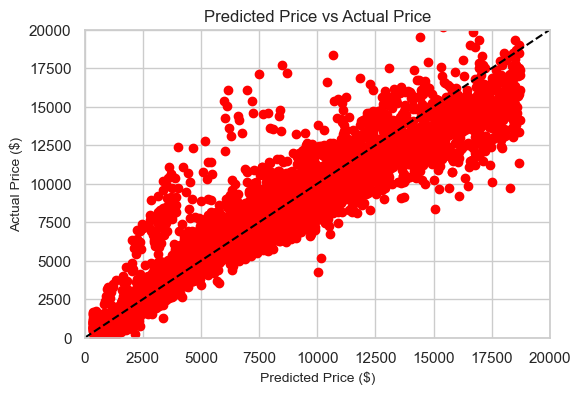

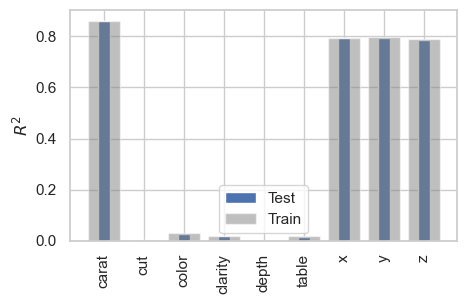

Training R^2 mean value 0.36776322838444586 Testing R^2 mean value 0.36596116512047117 
Training R^2 max value 0.860207771485941 Testing R^2 max value 0.8583992820129526 


In [53]:
# Realize Quantradic Transformation and model fit using lasso regression analysis
Poly_lasso = Lasso(alpha=1)
Poly_lasso.fit(X_train2_s,y_train)

Poly_lasso_R2 = get_accuracy_plots(Poly_lasso,X_train2_s, y_train, X_test2_s, y_test)
get_R2_features(Poly_lasso)

In [78]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Polynominal degree 2 + Lasso (alpha = 1)'], 'R2': Poly_lasso_R2})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,R2
0,smf,0.902000
0,LinearRegression,0.902411
0,Linear + Ridge (alpha = 10),0.902915
0,Polynominal degree 2,0.923734
0,Polynominal degree 2 + Lasso (alpha = 1),0.935887


##### Insight:
- We observe that polynominal fit with lasso regularization further increases the prediction accuracy.

#### vii) Apply polynominal regression fit with Ridge regularization and check results

Model coefficients: [    0.          2217.56276509    86.03303507   507.55992474
   641.15646195   -61.61357595   -35.20095831  -955.4040362
  1562.81087442   903.59005306 -2662.61363314   123.36999728
   -72.06216548  -868.32309949   -49.09670385   203.19229356
   419.5637384   2479.51396312  2043.65694822    13.06339761
    19.8010445     75.44984918   -24.77146675    -5.6284828
  -347.2315779   -188.9961948    542.72955039  -108.43190957
   186.9239327     35.02120903   -15.747686     160.01614612
   666.82725507  -277.4960564   -161.43297442    39.6980521
   -17.52356007  -868.6210112   2292.64115796  -269.04342209
    64.50812622    -9.45386401   271.80660332   718.05606001
  -963.62213188   -15.55212525   180.79788201  -394.06347323
    10.94011142  -974.79618967   -30.07035464 -1818.48496357
  1506.60329732  -437.46773398   589.95473699]
Training Accuracy: 0.936845612973806
Testing Accuracy: 0.9364769760361382
Model RMSE: 996.0655932389041


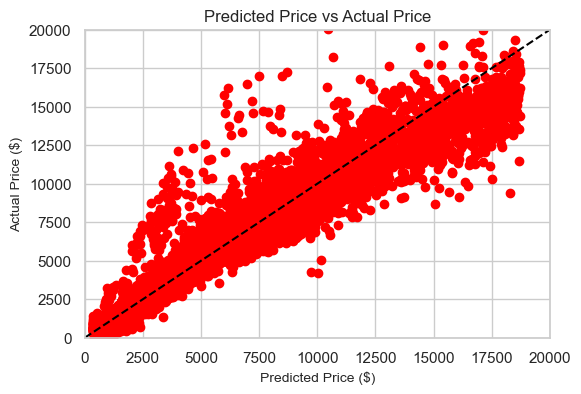

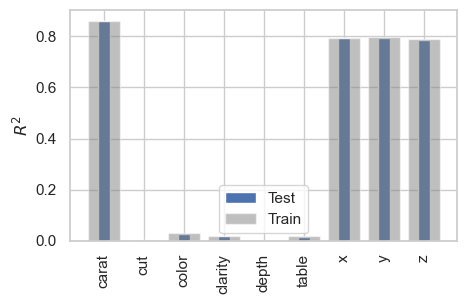

Training R^2 mean value 0.3677631089700417 Testing R^2 mean value 0.3659601492894448 
Training R^2 max value 0.860206650964357 Testing R^2 max value 0.8583896478584234 


In [56]:
Poly_ridge = Ridge(alpha=10)
Poly_ridge.fit(X_train2_s,y_train)

Poly_ridge_R2 = get_accuracy_plots(Poly_ridge,X_train2_s, y_train, X_test2_s, y_test)
get_R2_features(Poly_ridge)

In [79]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Polynominal degree 2 + Ridge (alpha = 10)'], 'R2': Poly_ridge_R2})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,R2
0,smf,0.902000
0,LinearRegression,0.902411
0,Linear + Ridge (alpha = 10),0.902915
0,Polynominal degree 2,0.923734
0,Polynominal degree 2 + Lasso (alpha = 1),0.935887
0,Polynominal degree 2 + Ridge (alpha = 10),0.936477


##### Insight:
- We observe that polynominal fit with ridge regularization further increases the prediction accuracy. So far, Polynomial regression with Ridge regularization has the best prediction. 

#### viii) Hyperparameter tuning based on the Polynomial regression with Ridge regularization using pipeline and grid search

In [58]:
# Realize Polynomial Transformation and model fit using Ridge linear regression analysis with hyperparameter tuning through pipeline

pipe_rg = Pipeline([
              ('scl', StandardScaler()),
              ('Poly',PolynomialFeatures()),
              ('Rg', Ridge())])

param_grid = {'Poly__degree':[1,2,3,4,5],'Rg__alpha':[0.03, 0.1, 0.3, 1, 3, 10]} 
grid_rg = GridSearchCV( pipe_rg , param_grid = param_grid, cv = 5) 

grid_rg.fit(X_train, y_train) 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scl', StandardScaler()),
                                       ('Poly', PolynomialFeatures()),
                                       ('Rg', Ridge())]),
             param_grid={'Poly__degree': [1, 2, 3, 4, 5],
                         'Rg__alpha': [0.03, 0.1, 0.3, 1, 3, 10]})

In [59]:
print(" Best cross-validation accuracy: {:.2f}". format( grid_rg.best_score_)) 
print(" Best parameters: ", grid_rg.best_params_) 
print(" Test set accuracy: {:.2f}". format( grid_rg.score( X_test, y_test)))

 Best cross-validation accuracy: 0.96
 Best parameters:  {'Poly__degree': 4, 'Rg__alpha': 10}
 Test set accuracy: 0.96


In [60]:
best_estimator = grid_rg.best_estimator_
print(best_estimator)

Pipeline(steps=[('scl', StandardScaler()),
                ('Poly', PolynomialFeatures(degree=4)),
                ('Rg', Ridge(alpha=10))])


Training Accuracy: 0.9635728555162716
Testing Accuracy: 0.9580917129386555
Model RMSE: 809.0443170292924


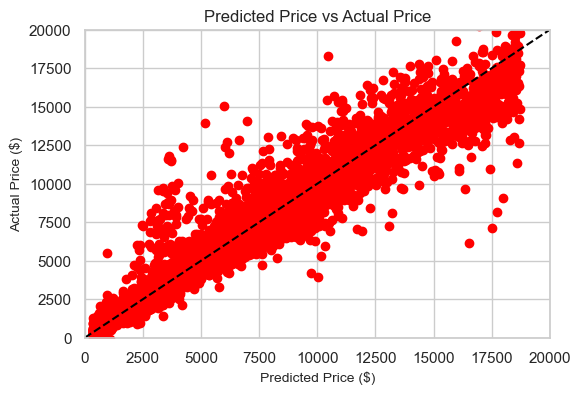

In [67]:
best_estimator.fit(X_train, y_train)
y_pred_rg = best_estimator.predict(X_test)
print("Training Accuracy:", best_estimator.score(X_train, y_train))
print("Testing Accuracy:", best_estimator.score(X_test, y_test))
MSE = mean_squared_error(y_pred_rg, y_test)
print("Model RMSE:", np.sqrt(MSE))
    
# Check the actual vs prediction
fig = plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rg, color='Red')
plt.plot([0,20000],[0,20000], '--', color='black')
plt.title('Predicted Price vs Actual Price', fontsize=12)
plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.xlabel('Predicted Price ($)', fontsize=10)
plt.ylabel('Actual Price ($)', fontsize=10)
plt.show() 

best_estmator_R2 = best_estimator.score(X_test, y_test)

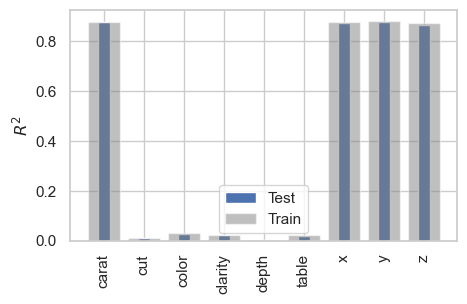

Training R^2 mean value 0.400280782392795 Testing R^2 mean value 0.39805765843523633 
Training R^2 max value 0.8811769868879887 Testing R^2 max value 0.8786420289608434 


In [68]:
get_R2_features(best_estimator)

In [80]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Polynominal degree 4 + Ridge (alpha = 10)'], 'R2': best_estmator_R2})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf_rset = resultsDf.reset_index(drop=True)
resultsDf_rset

,Method,R2
0,smf,0.902000
1,LinearRegression,0.902411
2,Linear + Ridge (alpha = 10),0.902915
3,Polynominal degree 2,0.923734
4,Polynominal degree 2 + Lasso (alpha = 1),0.935887
5,Polynominal degree 2 + Ridge (alpha = 10),0.936477
6,Polynominal degree 4 + Ridge (alpha = 10),0.958092


## Insight: 
- Hyperparameter tuning shows that higher order polynomial has to be used in combination with regularization. In particular, 4th order is required to get a better accuracy (R2_score), ~96%. This becomes our best model.

# 4. Insights and key findings


1. We have applied different regression models to analyze the data. These models include a statistical linear model, linear regression model, lasso model, ridge model, linear regression model based on polynomial transformation, lasso model based on polynomial transformation, and ridge model based on polynomial transformation. Finally, we performed hyperparameter tuning based on the polynomial regression with ridge regularization using pipeline and grid search methods.
   
2. The larger coefficients indicate the importance of the variables in the prediction. These attributes include weight and dimensions x, y, and z.

3. By trying different models, we have successfully enhanced the model prediction accuracy (R2 score) from 0.902 to 0.958. The best model, in terms of explainability and accuracy, considers the standard scalar and polynomial degree 4 transformations, as well as ridge regularization with alpha = 10. 


Text(0, 0.5, 'R2')

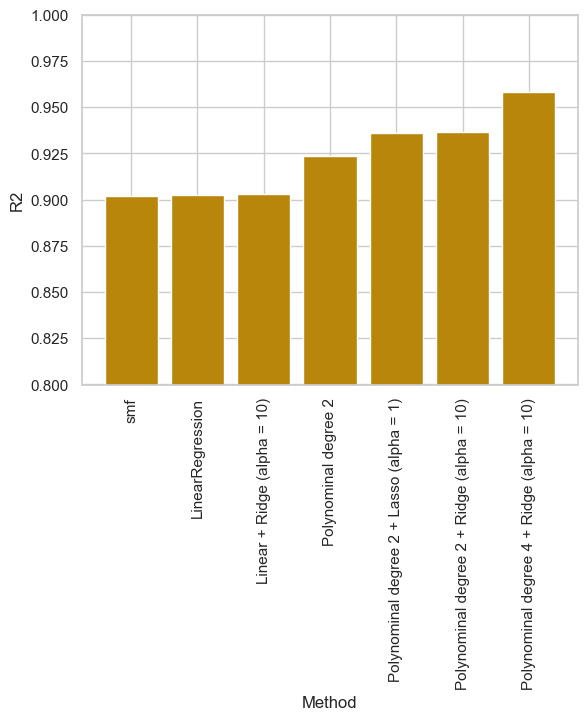

In [87]:
plt.bar(resultsDf_rset['Method'], resultsDf_rset['R2'], color = 'darkgoldenrod' )

# Add labels and title
plt.xticks(rotation=90)
plt.ylim([0.8,1])
plt.xlabel('Method')
plt.ylabel('R2')

# 5. Next Steps


1.  In this practice, we kept all the attributes for the price prediction. Next, we can select the most relevant features for the training model. For example, there exists a relationship between the volume (X, Y, Z) and weight, and the depth and table dimensions are also dependent on X, Y, and Z dimensions.  We may consider removing irrelevant or redundant features to improve model efficiency and performance.
   
2.  We may further increase the model prediction by trying other regression models. These models include but not limited to Random Frest Regressor, Support Vector Machine Regressor, Bagging Regressor, Ada Boost Regressor, Decision Tree Regressor, eXtreme Gradient Boosting Regressor, etc.

3.  Explore advanced techniques such as neural network method.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
